In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import copy

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

In [14]:
df = pd.read_csv('raw.githubusercontent.com_jbrownlee_Datasets_master_daily-min-temperatures.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df[:1000]
df = df[['Temp']]

df2 = pd.read_csv('BBG00B3T3HD3.csv')[:1000][['close']]

In [15]:
df

,Temp
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
...,...
995,12.9
996,7.7
997,7.6
998,3.5


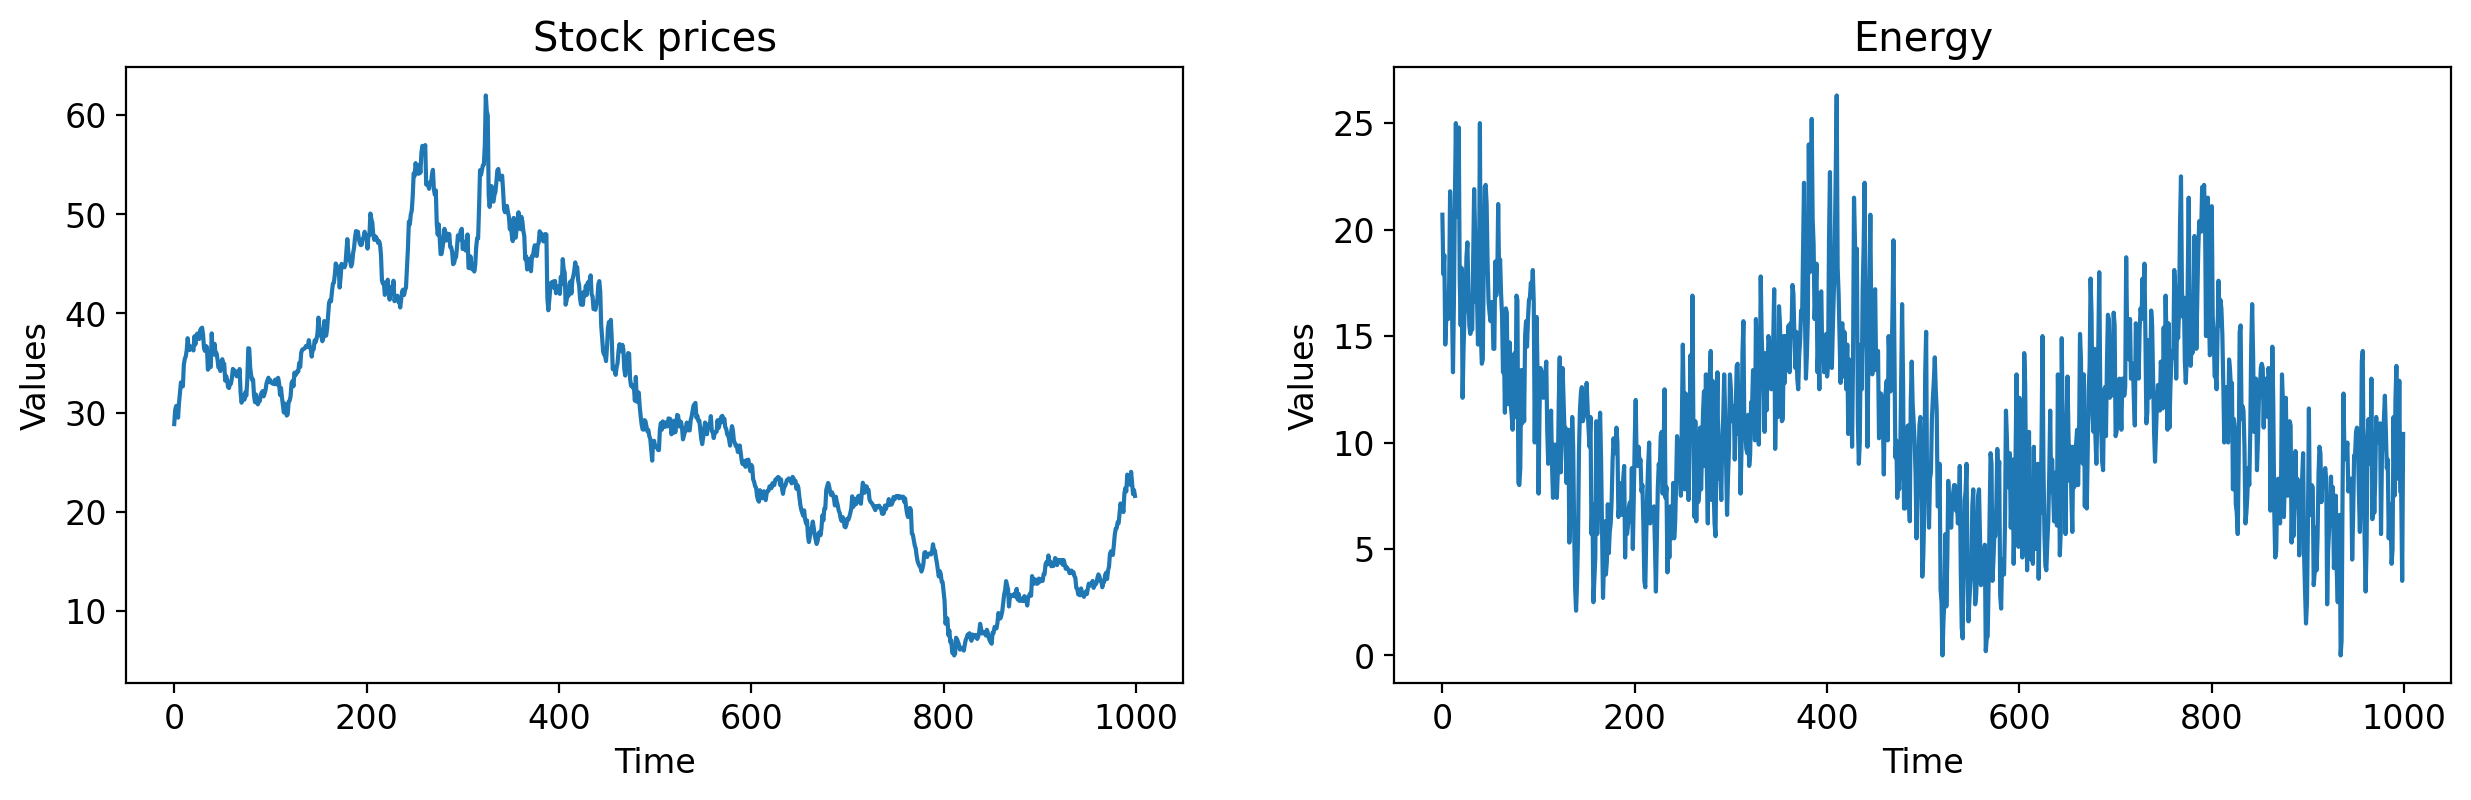

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)

axs[0].plot(df2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Values')
axs[0].set_title('Stock prices')

axs[1].plot(df)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Values')
axs[1].set_title('Energy')

plt.subplots_adjust(wspace=0.2)
plt.show()

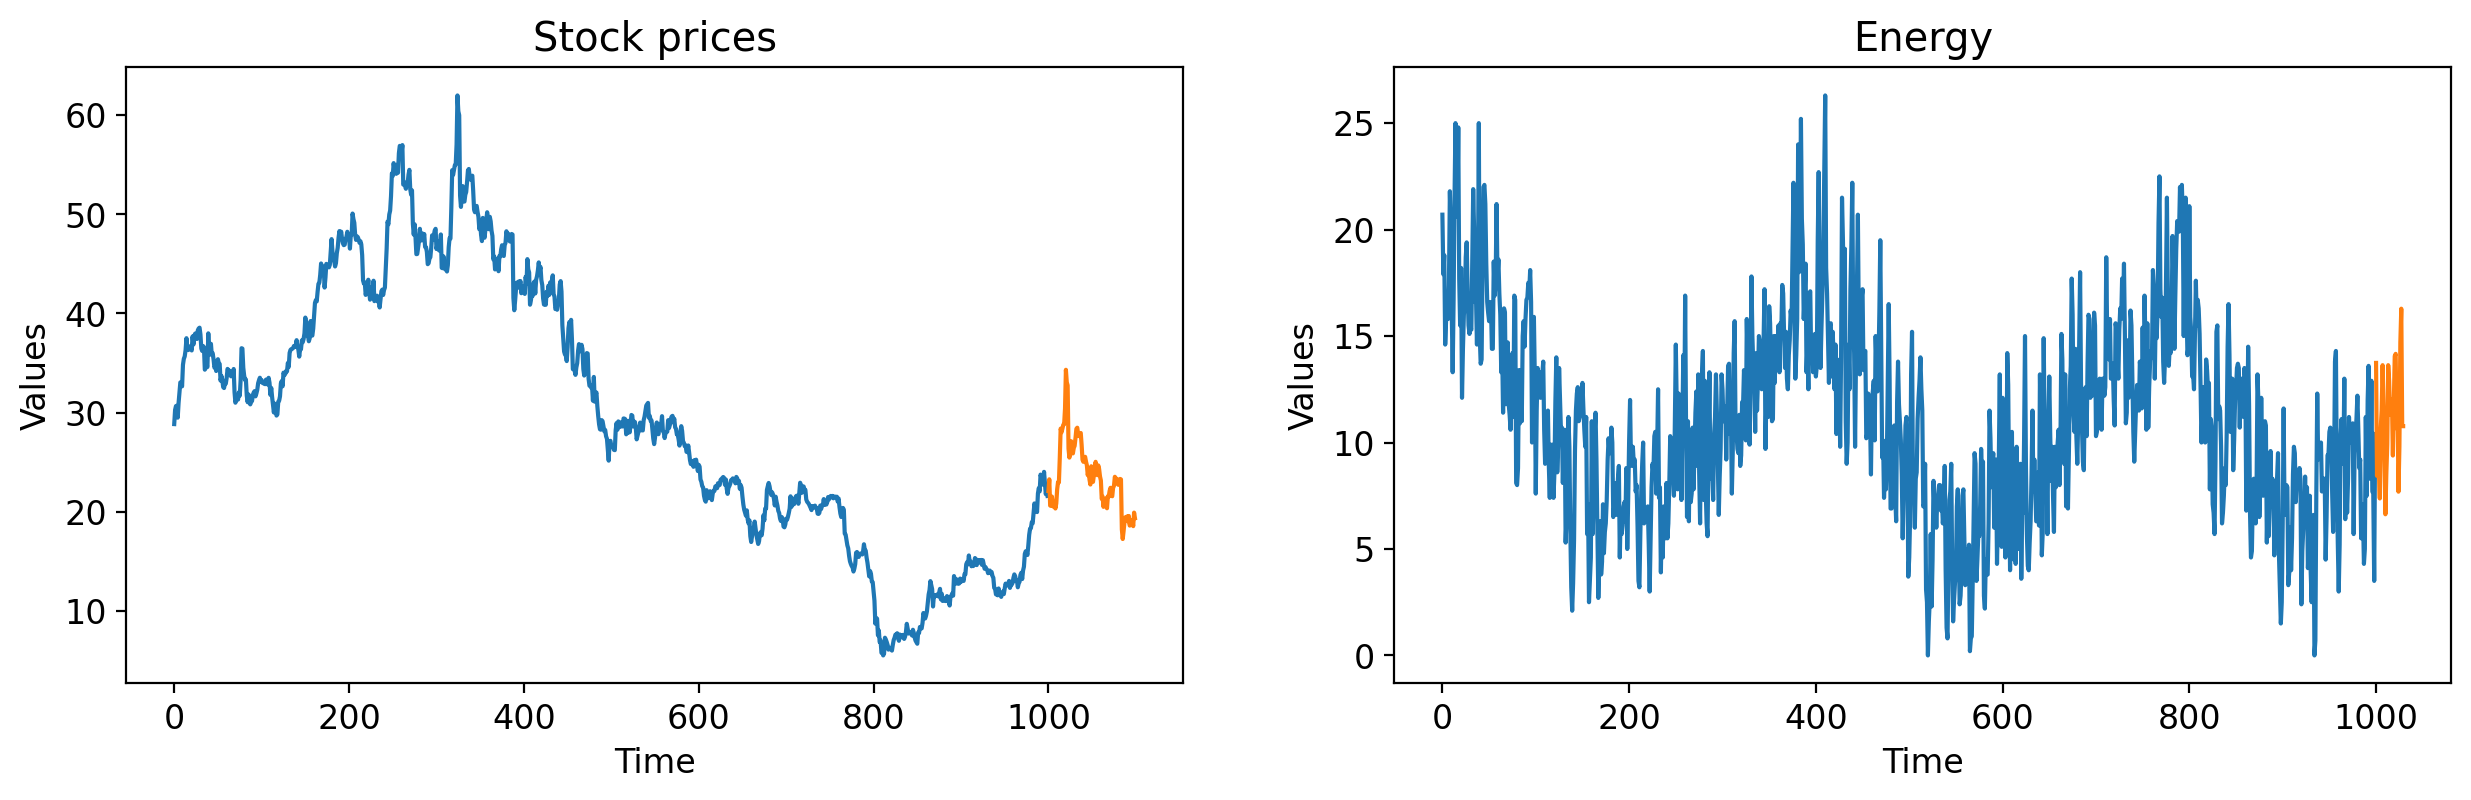

In [17]:
def forecast(data: np.array, h: int, m: int) -> np.array:
    z0 = data[-m:]
    z = [data[i : i+m] for i in range(len(data) - (m + h + 1), 0, -1)]
    max_idx = len(data) - (m + h + 1) - np.argmax(list(map(lambda x: np.cov(z0, x)[0, 1]/(np.std(x) * np.std(z0)), np.array(z))))
    zk = data[max_idx: max_idx + m].reshape(-1, 1)
    zk = np.hstack([zk, np.ones(m).reshape(-1, 1)])

    coef = np.matmul(np.matmul(zk.T, z0.reshape(-1, 1)).T, np.linalg.inv(np.matmul(zk.T, zk)))[0]

    return data[max_idx + m : max_idx + m + h] * coef[0] + coef[-1]

df2_pred = forecast(df2.values.reshape(-1), h=100, m=13)
df_pred = forecast(df.values.reshape(-1), h=30, m=6)

fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)

axs[0].plot(np.arange(len(df2)), df2)
axs[0].plot(np.arange(len(df2_pred))+len(df2), df2_pred)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Values')
axs[0].set_title('Stock prices')

axs[1].plot(np.arange(len(df)), df)
axs[1].plot(np.arange(len(df_pred))+len(df), df_pred)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Values')
axs[1].set_title('Energy')

plt.subplots_adjust(wspace=0.2)
plt.show()